# Titanic Classification

Author: Soumya Bhanupriya

Batch: July  : Data Science

Aim: Create a model using the Titanic dataset to predict whether a Titanic passenger survived or not.The dataset includes information on individual passengers, including age, gender, ticket class, fare, cabin, and survival status.

# Import Dependencies

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

# Data Collection and Preprocessing of the data

Data Loading

In [36]:
file_path = r'C:\Users\soumy\OneDrive\Documents\Titanic-Dataset.csv'
try:
    titanic_data = pd.read_csv(file_path)
    display(titanic_data.head())
except FileNotFoundError:
    print("File '{file_path}' not found. Please check the file path and try again.")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


No. of rows and columns

In [37]:
titanic_data.shape # each row 1 passenger

(891, 12)

Basic info of the data we have

In [38]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Knowing our missing values

In [39]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handling the Missing values

In [40]:
print(titanic_data.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [41]:
if 'Cabin' in titanic_data.columns:
    titanic_data = titanic_data.drop(columns='Cabin', axis=1)
else:
    print("Column 'Cabin' does not exist.")


In [42]:
file_path = r'C:\Users\soumy\OneDrive\Documents\Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)
# Droping the 'Cabin' column
titanic_data = titanic_data.drop(columns='Cabin', axis=1)
display(titanic_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [43]:
# Fill missing values in the 'Age' column with the mean age
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)


In [44]:
#now find the mode value ie. the most repeated value in the Embarked column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [45]:
print(titanic_data['Embarked'].mode()[0])

S


In [46]:
#replace the missing values in the 'Embarked' column with the mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
display(titanic_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [47]:
titanic_data.isnull().sum()  #again repeating this process to know missing data

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Analysis

In [48]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
# To find the number of people survived and not survived
titanic_data['Survived'].value_counts()
#here we by the output we know the the no. of survivers in the titanic accident is lower than the non-survivers

0    549
1    342
Name: Survived, dtype: int64

# Data Visualization

In [50]:
sns.set()

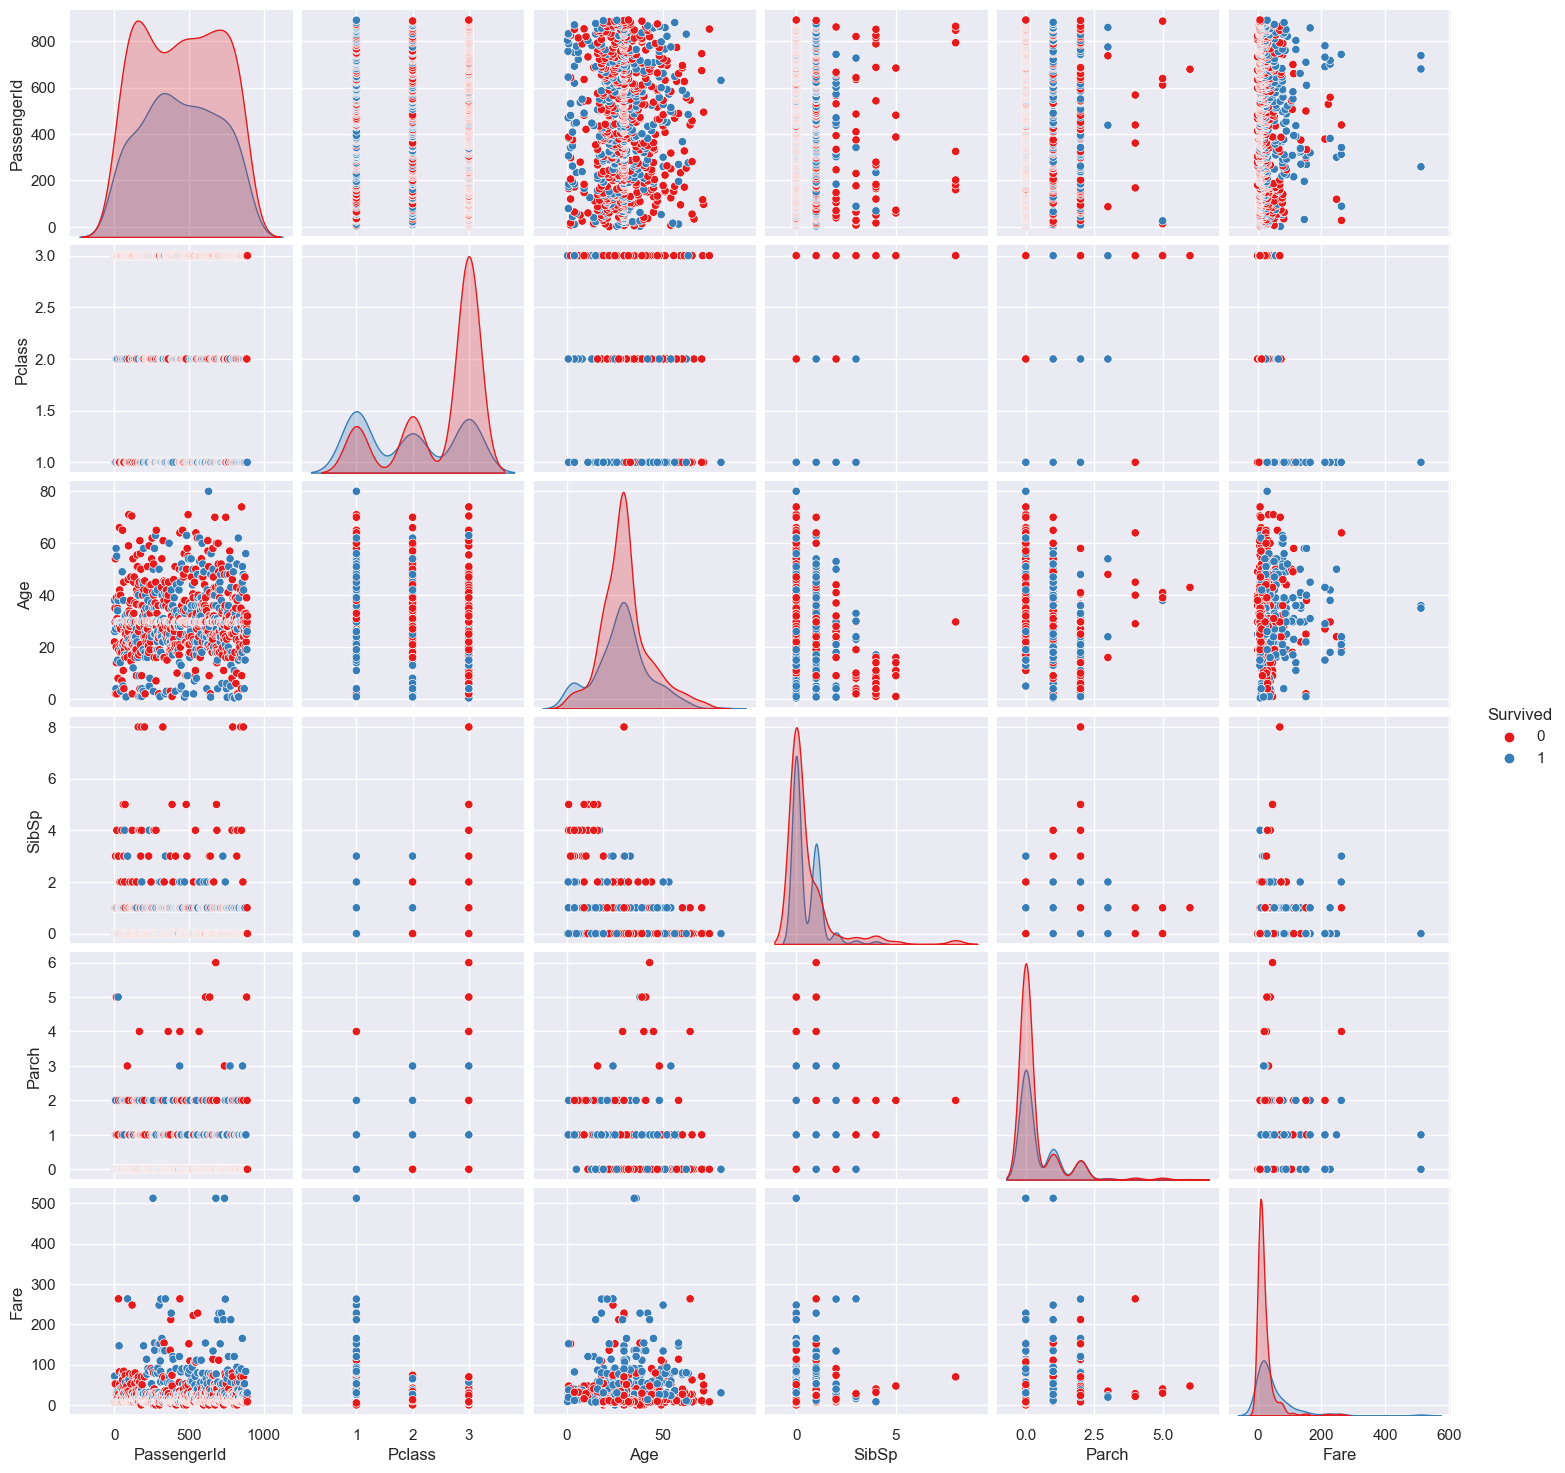

In [51]:

# Creating the pairplot
sns.pairplot(titanic_data, hue='Survived', palette='Set1')
plt.show()


for the Survived Column

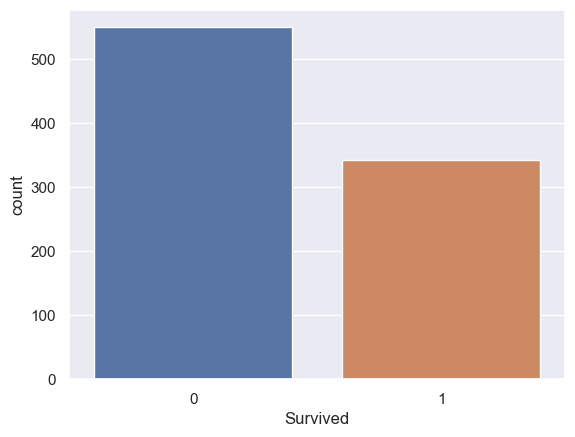

In [52]:
#count plot for the "survived" column for which we have the seaborns library also we are taking the data from the titanic_data
sns.countplot(x='Survived', data=titanic_data)
plt.show()


For the Sex Column

In [53]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

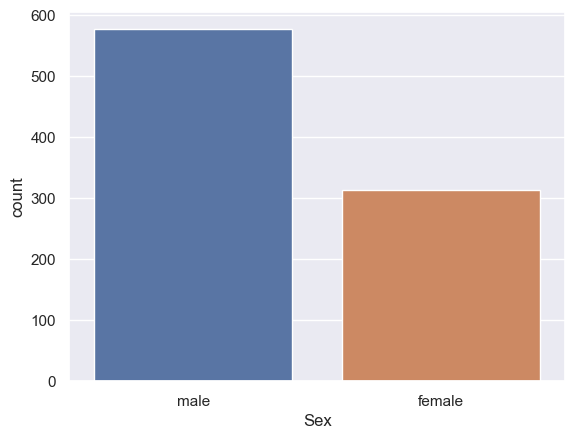

In [54]:
sns.countplot(x='Sex', data=titanic_data)
plt.show()

No. of survivers Gender Wise

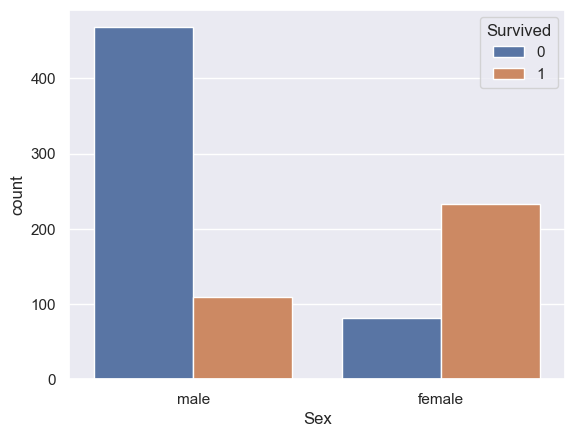

In [55]:
# Create a count plot with 'Sex' on x-axis and 'Survived' as hue
sns.countplot(x='Sex', hue='Survived', data=titanic_data)
plt.show()

Count plots of distinct columns

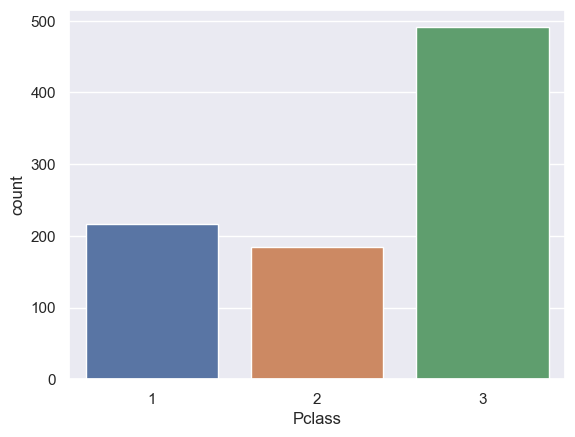

In [56]:
# Create a count plot with 'Pclass' on x-axis and 'Survived' as hue
sns.countplot(x='Pclass', data=titanic_data)
plt.show()

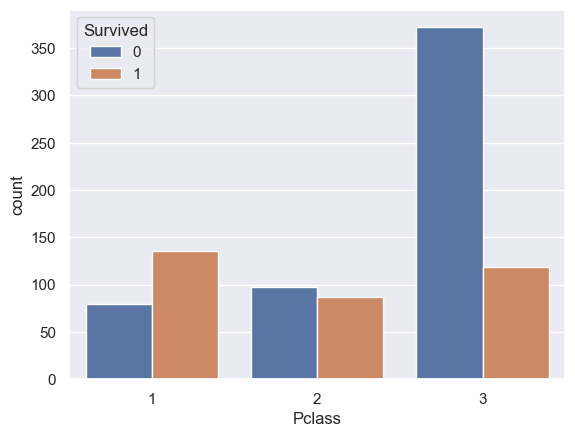

In [57]:
# Create a count plot with 'Pclass' on x-axis and 'Survived' as hue
sns.countplot(x='Pclass',hue='Survived', data=titanic_data)
plt.show()

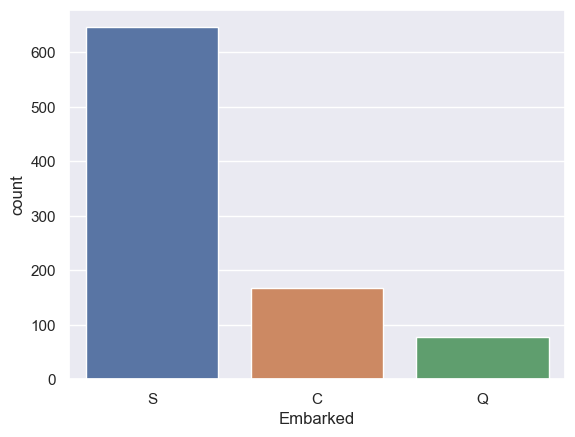

In [58]:
# Create a count plot with 'Embarked' on x-axis and 'Survived' as hue
sns.countplot(x='Embarked', data=titanic_data)
plt.show()

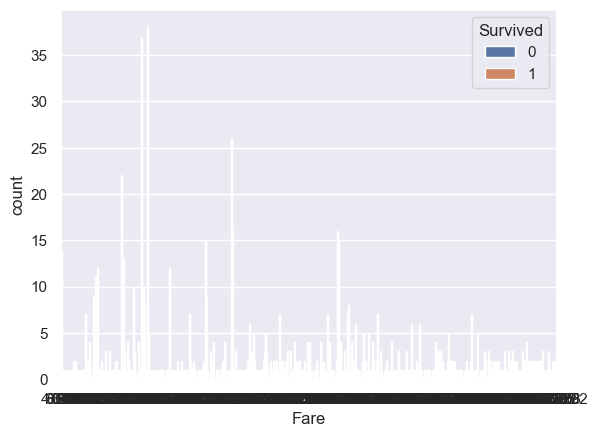

In [59]:
# Create a count plot with 'Fare' on x-axis and 'Survived' as hue
sns.countplot(x='Fare', hue='Survived', data=titanic_data)
plt.show()

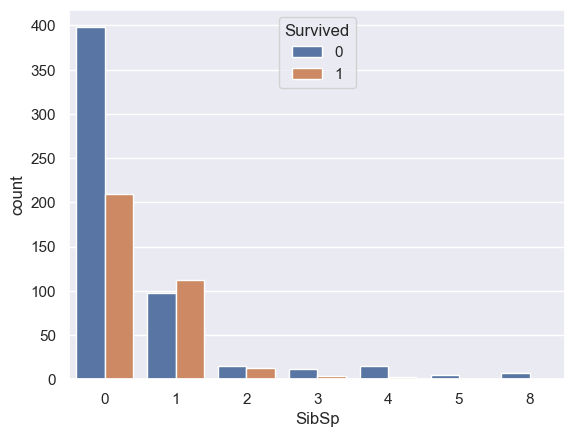

In [60]:
# Create a count plot with 'SibSp' on x-axis and 'Survived' as hue
sns.countplot(x='SibSp', hue='Survived', data=titanic_data)
plt.show()

# Encoding the Categorical Columns

In [61]:
# Count the occurrences of unique values in the 'Sex' column
sex_counts = titanic_data['Sex'].value_counts()
print(sex_counts)

male      577
female    314
Name: Sex, dtype: int64


In [62]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Conversion to the Categorical Columns

In [63]:
# Replace categorical values with numerical values
titanic_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)
display(titanic_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# Feature Selection

In [64]:
# Separate features (X) and target (Y)
X = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y = titanic_data['Survived']


In [65]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [66]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# Splitting the data into training and test sets

In [67]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
# Display the shapes of the resulting datasets
# here we used from sklearn.model_selection import train_test_split
print("Training features shape:", X_train.shape , X_test.shape)
print("Training target shape:", Y_train.shape , Y_test.shape)


Training features shape: (712, 7) (179, 7)
Training target shape: (712,) (179,)


# Model Training

Logistic Regression


In [68]:
model = LogisticRegression()
model.fit(X_train, Y_train)
print("Model training completed.")


Model training completed.


# Model Evaluation

Accuracy Score

In [69]:
X_train_prediction= model.predict(X_train)
print(X_train_prediction)
training_data_accuracy =accuracy_score(Y_train, X_train_prediction)
print('Accuracy score on training data:', training_data_accuracy)


[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [70]:
X_test_prediction= model.predict(X_test)
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [71]:
test_data_accuracy= accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test of test data:', test_data_accuracy)

Accuracy score of test of test data: 0.7821229050279329


# Prediction whether the person survived or not

In [72]:
def get_user_input():
    try:
        p_class = int(input("Enter the Passenger class (1, 2, or 3): "))
        gender = input("Enter Gender (male or female): ").strip().lower()

        if gender == 'male':
            gender = 0
        elif gender == 'female':
            gender = 1
        else:
            raise ValueError("Enter either 'male' or 'female' for gender.")
        
        age = float(input("Enter Age: "))
        sibsp = int(input("Enter number of siblings/spouses aboard: "))
        parch = int(input("Enter number of parents/children aboard: "))
        fare = float(input("Enter Fare: "))
        embarked = input("Enter Embarked (S, C, Q): ").strip().upper()

        # Prepare the input data in the same format as your model expects
        input_data = [[p_class, gender, age, sibsp, parch, fare, embarked]]

        return input_data
    
    except ValueError as e:
        print("Error: {e}")
        return None

user_input = get_user_input()

if user_input:
    print("User Input:", user_input)  # Debugging print
    try:
        # Ensure categorical variables are converted to numerical format if needed
        gender = user_input[0][1]
        embarked = user_input[0][6]
        
        # Make sure categorical variables are correctly encoded
        if embarked == 'S':
            embarked = 0
        elif embarked == 'C':
            embarked = 1
        elif embarked == 'Q':
            embarked = 2
        else:
            raise ValueError("Invalid value for Embarked. Enter 'S', 'C', or 'Q'.")
        
        user_input[0][1] = gender
        user_input[0][6] = embarked
        
        prediction = model.predict(user_input)
        print("Raw Prediction:", prediction) 

        if prediction[0] == 0:
            print("Prediction: Sorry, the passenger did not survive.")
        else:
            print("Prediction: The passenger survived!")

    except ValueError as e:
        print("Prediction error: {e}")


Enter the Passenger class (1, 2, or 3): 1
Enter Gender (male or female): female
Enter Age: 29
Enter number of siblings/spouses aboard: 0
Enter number of parents/children aboard: 0
Enter Fare: 100
Enter Embarked (S, C, Q): C
User Input: [[1, 1, 29.0, 0, 0, 100.0, 'C']]
Raw Prediction: [1]
Prediction: The passenger survived!
